In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

first of all, we import libraries we need. we import pandas and numpy as they are useful for analysing data and matplotlib for plotting data. plotting data can help us to understand data better. This way we can have better intuitions about data.

In [3]:
df=pd.read_csv("/home/parmida/Documents/student-mat.csv",sep=";")

df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


so as you can see here, the data set is intuitive we can understand it easy because we all can guess that studytime,travel time health and mother and father education would be important for our success at school. Me as agirl also recognised differences between girls and boys too. which is a long story. girls sometimes are not confident enough and have more stress during teenage and this affects the marks. so im curios to see what is going on here:

so as u can guess based on my previous sentences im gonna check that how study time and gender can be compared and look at it !wow! 

/home/parmida/desktop/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


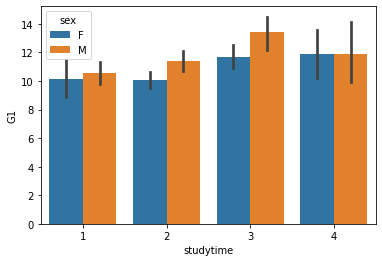

In [5]:
sns.barplot(x="studytime",y="G1",hue="sex",data=df)

we can see boys have more free time. sounds logical!

/home/parmida/desktop/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


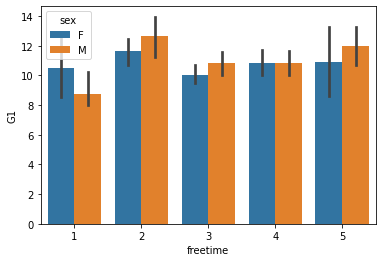

In [11]:
sns.barplot(x="freetime",y="G1",hue="sex",data=df)

seems like men are more sensetive to famsup!

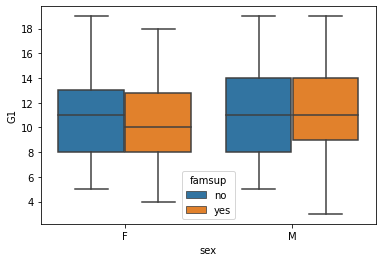

In [16]:
sns.boxplot(x="sex",y="G1",hue="famsup",data=df)

In [ ]:
sns.barplot(x)

Now we have to change our data types. We may want to change some categorical data and encode them by numerical values. this way we can analyse them more efficiently.

In [132]:
df.dtypes


school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

as you know some attrubutes are binary. like sex:male or female. if we encode them as 0 and 1 , we can have a better time analysing them !
now we are going to make a whole new data frame of only object attributes:

In [133]:
obj_df=df.select_dtypes(include=['object']).copy()
obj_df.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


Now, before going any further we have to check if there is any null vaulues.
these valuse make our dataset messy!


In [134]:
obj_df[obj_df.isnull().any(axis=1)]

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic


fourtunately there is no null values out there! now we move on net step. we are gonna make a mapping dictionary of objrcts to corresponding numbers as below:

In [135]:
cleanup_nums={"sex":{"F":1,"M":0},"school":{"GP":0,"MS":1},"address":{"U":0,"R":1},"famsize":{"GT3":1,"LE3":0},"Pstatus":{"A":0,"T":1},"Mjob":{"teacher":0,"health":1,"services":2,"at_home":3,"other":4},"Fjob":{"teacher":0,"health":1,"services":2,"at_home":3,"other":4},"reason":{"home":0,"reputation":1,"course":2,"other":3},"guardian":{"mother":1,"father":0,"other":2},"schoolsup":{"yes":1,"no":0},"famsup":{"yes":1,"no":0},"paid":{"yes":1,"no":0},"activities":{"yes":1,"no":0},"nursery":{"yes":1,"no":0},"higher":{"yes":1,"no":0},"internet":{"yes":1,"no":0},"romantic":{"yes":1,"no":0}}
df.replace(cleanup_nums,inplace=True)

In [136]:
obj_df.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


now you can see first five rows of data set.As you can see categorical data now has turned into numeric encoding.

In [138]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,1,18,0,1,0,4,4,3,0,...,4,3,4,1,1,3,6,5,6,6
1,0,1,17,0,1,1,1,1,3,4,...,5,3,3,1,1,3,4,5,5,6
2,0,1,15,0,0,1,1,1,3,4,...,4,3,2,2,3,3,10,7,8,10
3,0,1,15,0,1,1,4,2,1,2,...,3,2,2,1,1,5,2,15,14,15
4,0,1,16,0,1,1,3,3,4,4,...,4,3,2,1,2,5,4,6,10,10


In [139]:
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,1,18,0,1,0,4,4,3,0,...,4,3,4,1,1,3,6,5,6,6
1,0,1,17,0,1,1,1,1,3,4,...,5,3,3,1,1,3,4,5,5,6
2,0,1,15,0,0,1,1,1,3,4,...,4,3,2,2,3,3,10,7,8,10
3,0,1,15,0,1,1,4,2,1,2,...,3,2,2,1,1,5,2,15,14,15
4,0,1,16,0,1,1,3,3,4,4,...,4,3,2,1,2,5,4,6,10,10


so we again check with our new format the relationship between gender and studytime:

/home/parmida/desktop/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


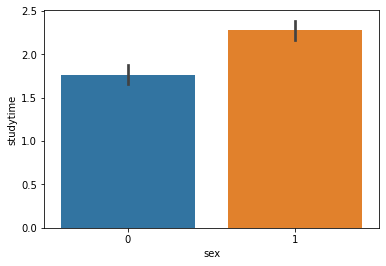

In [140]:
sns.barplot(x="sex",y="studytime",data=df)

as you can see in the heatmap, sex and study time are correlated. with this bar chart we can interpret correlation like this: when someone studies more, it means that this person is more likely to be a girl.As you can see, Girls study more than boys . let;s take a look at girls performance in math:


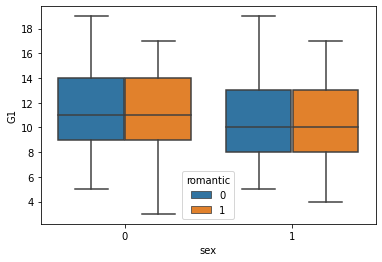

In [156]:
sns.boxplot(x="sex",y="G1",hue='romantic',data=df)

romantic relationships does not affect G1 math performance.Let's look at G2:

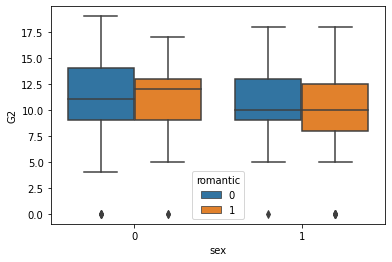

In [155]:
sns.boxplot(x="sex",y="G2",hue='romantic',data=df)

in G2 it affects more,in G3 it becomes even worse . it doesnt affect boys that much anyways(poor girls;LOL)

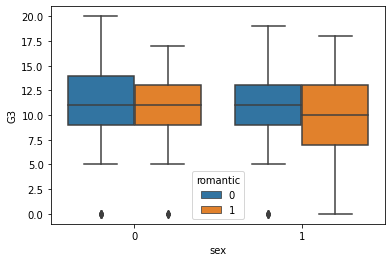

In [154]:
sns.boxplot(x="sex",y="G3",hue='romantic',data=df)


As you can see girls performance is a little bit lower than boys. let's figure out the reasons:

let's see if romantic relationships can affect girls focus and performance?

/home/parmida/desktop/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


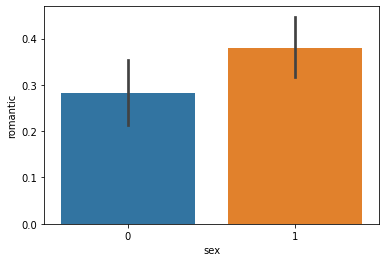

In [151]:
sns.barplot(x='sex',y='romantic',data=df)

/home/parmida/desktop/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


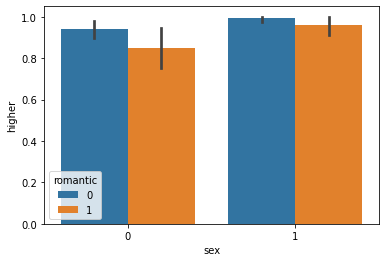

In [152]:
sns.barplot(x='sex',y='higher',hue='romantic',data=df)


as you can see romance doesn't effect marks that much!(have fun!).we can consider this from the correlation coefficient too.

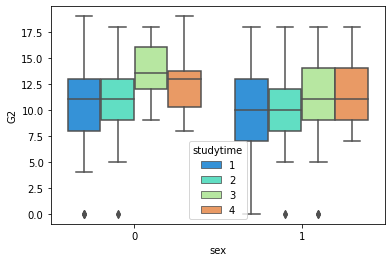

In [157]:
sns.boxplot(x="sex",y="G2",hue="studytime",data=df,palette='rainbow')

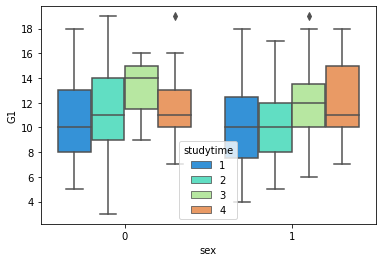

In [158]:
sns.boxplot(x="sex",y="G1",hue="studytime",data=df,palette='rainbow')

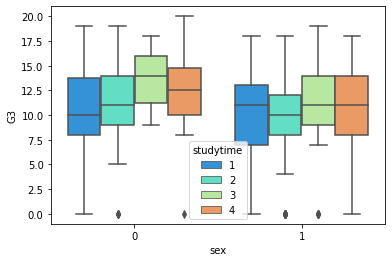

In [161]:
sns.boxplot(x="sex",y="G3",hue="studytime",data=df,palette='rainbow')

let's see how well educated are girls parents?

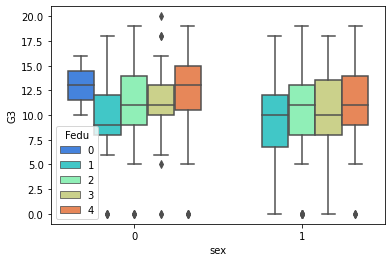

In [162]:
sns.boxplot(x="sex",y="G3",hue="Fedu",data=df,palette='rainbow')

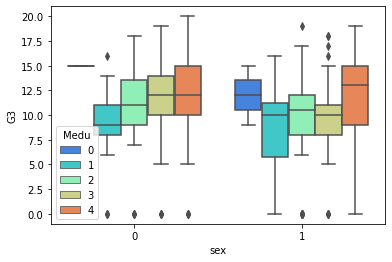

In [163]:
sns.boxplot(x="sex",y="G3",hue="Medu",data=df,palette='rainbow')

seems we didn't find anything special !

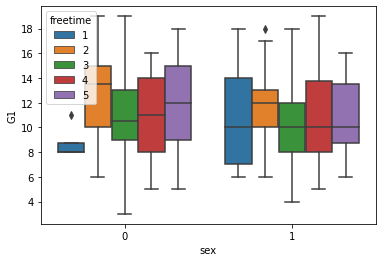

In [164]:
sns.boxplot(x="sex",y="G1",hue='freetime',data=df)


/home/parmida/desktop/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


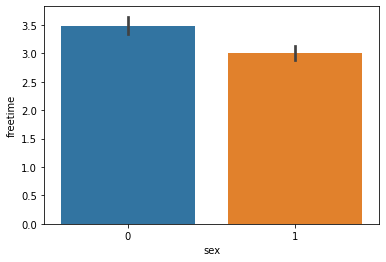

In [165]:
sns.barplot(x="sex",y="freetime",data=df)

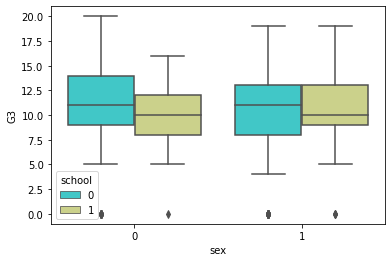

In [166]:
sns.boxplot(x="sex",y="G3",hue="school",data=df,palette='rainbow')

([<matplotlib.patches.Wedge at 0x7f39d0d915c0>,
 [Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text(1.1, 0.0, ''),
  Text

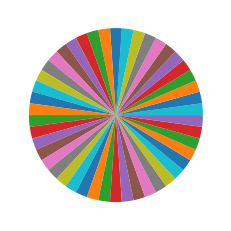

In [172]:
plt.pie(df['school'])

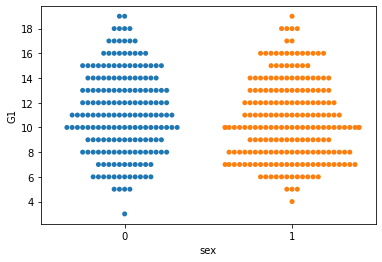

In [62]:
sns.swarmplot(x="sex",y="G1",data=df)

In [71]:
corr_matrix=df.corr()
print(corr_matrix)

              school       sex       age   address   famsize   Pstatus  \
school      1.000000  0.012286  0.377610  0.279797 -0.064866  0.045923   
sex         0.012286  1.000000  0.028606 -0.028504  0.089862 -0.023443   
age         0.377610  0.028606  1.000000  0.146722 -0.037847  0.029598   
address     0.279797 -0.028504  0.146722  1.000000  0.072472  0.042572   
famsize    -0.064866  0.089862 -0.037847  0.072472  1.000000  0.149612   
Pstatus     0.045923 -0.023443  0.029598  0.042572  0.149612  1.000000   
Medu       -0.133333 -0.078228 -0.163658 -0.138804  0.043068 -0.123565   
Fedu       -0.079807 -0.034878 -0.163438 -0.072178  0.058879 -0.088730   
Mjob        0.065339  0.115762  0.089558  0.096169  0.087041 -0.012711   
Fjob       -0.012333 -0.004110  0.065816  0.055468 -0.047132  0.020772   
reason      0.126028 -0.009822  0.005780  0.119302  0.000981  0.036182   
guardian    0.011109  0.071343  0.290485  0.044512  0.002718 -0.108715   
traveltime  0.242308 -0.059722  0.0706

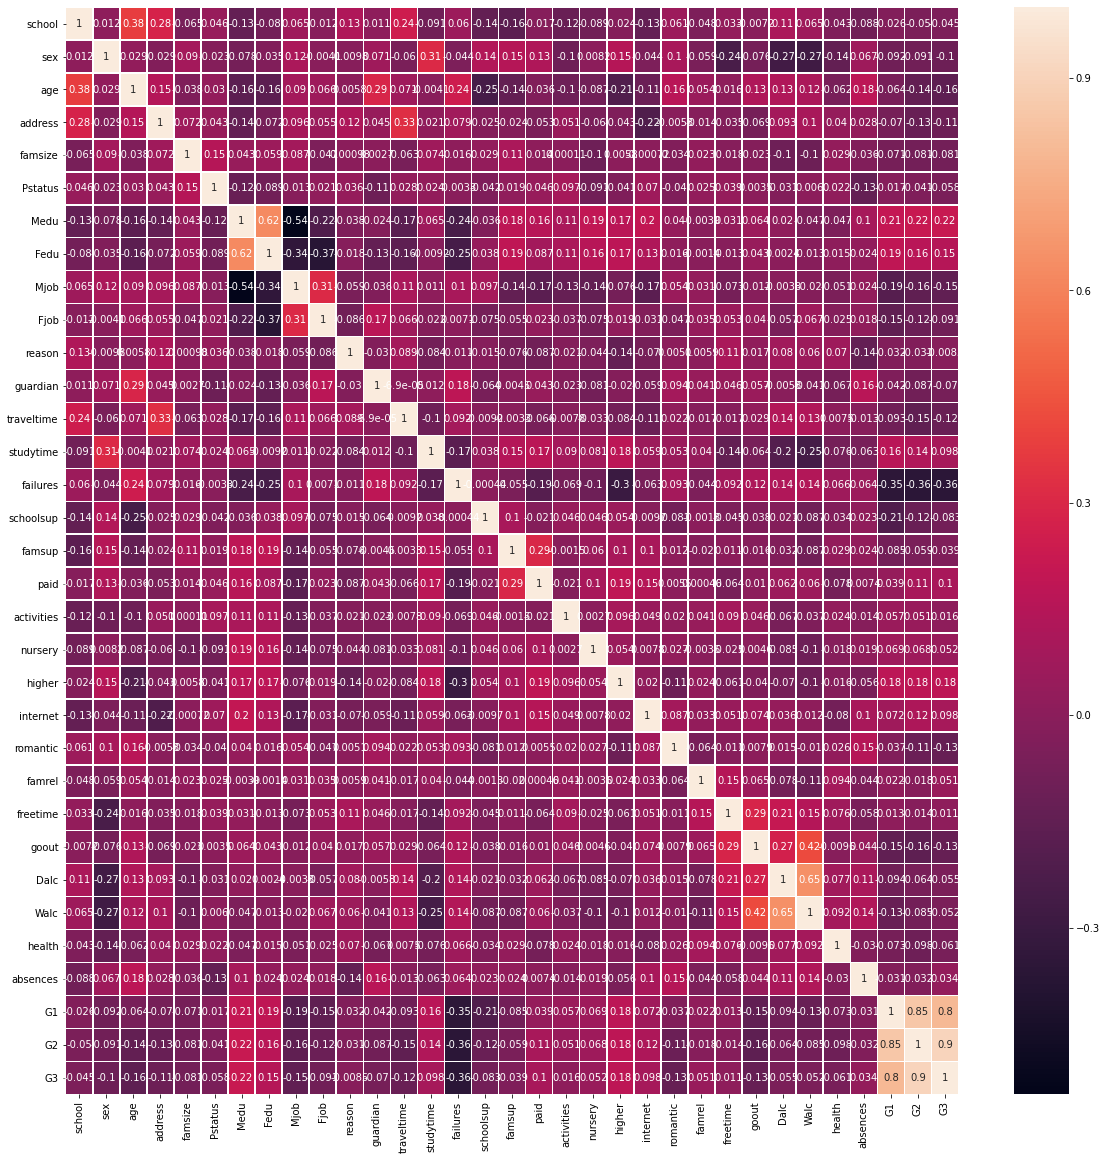

In [94]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,linewidth=0.5,annot=True)

In [127]:

corr_matrix.abs().sort_values('goout',ascending=False)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
goout,0.007152,0.075897,0.126964,0.068835,0.023064,0.003459,0.064094,0.043105,0.012494,0.040243,...,0.064568,0.285019,1.000000,0.266994,0.420386,0.009577,0.044302,0.149104,0.162250,0.132791
Walc,0.065087,0.274194,0.117276,0.101126,0.103425,0.006045,0.047123,0.012631,0.020245,0.066906,...,0.113397,0.147822,0.420386,0.647544,1.000000,0.092476,0.136291,0.126179,0.084927,0.051939
freetime,0.032988,0.238744,0.016434,0.034878,0.017695,0.038717,0.030891,0.012846,0.073211,0.053002,...,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,0.058078,0.012613,0.013777,0.011307
Dalc,0.114209,0.268171,0.131125,0.093494,0.101521,0.030590,0.019834,0.002386,0.003754,0.056839,...,0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,0.094159,0.064120,0.054660
G2,0.050086,0.091099,0.143474,0.126037,0.081223,0.041382,0.215527,0.164893,0.155340,0.115121,...,0.018281,0.013777,0.162250,0.064120,0.084927,0.097720,0.031777,0.852118,1.000000,0.904868
G1,0.025731,0.091839,0.064081,0.069704,0.071445,0.016868,0.205341,0.190270,0.187996,0.152132,...,0.022168,0.012613,0.149104,0.094159,0.126179,0.073172,0.031003,1.000000,0.852118,0.801468
G3,0.045017,0.103456,0.161579,0.105756,0.081407,0.058009,0.217147,0.152457,0.145827,0.091128,...,0.051363,0.011307,0.132791,0.054660,0.051939,0.061335,0.034247,0.801468,0.904868,1.000000
age,0.377610,0.028606,1.000000,0.146722,0.037847,0.029598,0.163658,0.163438,0.089558,0.065816,...,0.053940,0.016434,0.126964,0.131125,0.117276,0.062187,0.175230,0.064081,0.143474,0.161579
failures,0.059804,0.044436,0.243665,0.078578,0.015769,0.003339,0.236680,0.250408,0.103623,0.007068,...,0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,0.354718,0.355896,0.360415
sex,0.012286,1.000000,0.028606,0.028504,0.089862,0.023443,0.078228,0.034878,0.115762,0.004110,...,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,0.066962,0.091839,0.091099,0.103456


In [17]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000
